In [15]:
# Add the dependencies.
import pandas as pd
import os
from sqlalchemy import create_engine, func
from config import DATABASE_URI
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from tensorflow.keras import metrics
#from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [16]:
results_df = pd.read_csv('test_result.csv')
results_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1
0,C1,68,0.0002,80,80,80,False,0.0,0.0,0,0,62.8,22.6,2.98 - 58.8j,0.0
1,C1,204,0.0002,80,80,80,False,0.0,0.0,0,0,62.8,22.6,2.98 - 58.8j,0.0
2,C1,393,0.0002,80,80,80,False,0.0,0.0,0,0,62.8,22.6,2.98 - 58.8j,0.0
3,C1,503,0.0002,80,80,80,False,0.0,0.0,0,0,62.8,22.6,2.98 - 58.8j,0.0
4,C1,619,0.0002,80,80,80,False,0.0,0.0,0,0,62.8,22.6,2.98 - 58.8j,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,C1,379156,0.0003,80,80,80,False,0.0,0.0,90,10,90.0,16.0,1.51 - 40.5j,0.0
2114,C1,379442,0.0003,80,80,80,False,0.0,0.0,90,10,90.0,16.0,1.51 - 40.5j,0.0
2115,C1,379594,0.0003,80,80,80,False,0.0,0.0,90,10,90.0,16.0,1.51 - 40.5j,0.0
2116,C1,379829,0.0003,80,80,80,False,0.0,0.0,90,10,90.0,16.0,1.51 - 40.5j,0.0


In [17]:
temp1_df = results_df[results_df['o_o'] == True]
temp1_df['pw1_Diff'] = temp1_df['pw1'].diff()
temp1_df['index1'] = temp1_df.index
temp1_df.head()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1
16,C1,2483,0.0002,80,80,80,True,0.0,0.0,72,47,62.8,22.6,2.98 - 58.8j,0.0,NaN,16
17,C1,2579,0.0002,80,80,80,True,0.0,0.0,72,47,62.8,22.6,2.98 - 58.8j,0.0,0.0,17
18,C1,2773,0.0002,50,50,50,True,0.0,0.0,72,47,62.8,22.6,2.98 - 58.8j,0.0,0.0,18
19,C1,2914,0.0002,50,50,50,True,0.0,0.0,72,47,62.8,22.6,2.98 - 58.8j,0.0,0.0,19
20,C1,3018,0.0002,50,50,50,True,0.0,0.0,72,47,62.8,22.6,2.98 - 58.8j,0.0,0.0,20


In [18]:
temp2_df = temp1_df[(temp1_df['pw1'] > 0) & \
                    ((temp1_df['re'] > temp1_df['pw1']*0.05 )|(temp1_df['re'] == 0)) & (temp1_df['pr1'] > 0.005)]
temp2_df.tail()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1
2010,C1,359584,0.0489,80,80,80,True,269.468,198.356,90,10,15.4,46.4,19.4 - 77.6j,123.20,7.800,2010
2011,C1,359847,0.0491,80,80,80,True,400.000,146.872,90,10,21.9,34.8,13.6 - 65.2j,131.39,130.532,2011
2012,C1,360022,0.0493,80,80,80,True,400.000,146.452,90,10,43.4,26.7,13.6 - 65.2j,131.39,0.000,2012
2013,C1,360136,0.0493,80,80,80,True,400.000,59.664,90,10,43.4,26.7,5.36 - 62.8j,141.60,0.000,2013
2014,C1,360397,0.0494,80,80,80,True,400.000,34.540,90,10,49.5,24.0,4.10 - 59.3j,141.60,0.000,2014


In [19]:
temp2_df['index1_Diff'] = temp2_df['index1'] - temp2_df['index1'].shift(-1)
temp2_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff
2010,C1,359584,0.0489,80,80,80,True,269.468,198.356,90,10,15.4,46.4,19.4 - 77.6j,123.20,7.800,2010,-1.0
2011,C1,359847,0.0491,80,80,80,True,400.000,146.872,90,10,21.9,34.8,13.6 - 65.2j,131.39,130.532,2011,-1.0
2012,C1,360022,0.0493,80,80,80,True,400.000,146.452,90,10,43.4,26.7,13.6 - 65.2j,131.39,0.000,2012,-1.0
2013,C1,360136,0.0493,80,80,80,True,400.000,59.664,90,10,43.4,26.7,5.36 - 62.8j,141.60,0.000,2013,-1.0
2014,C1,360397,0.0494,80,80,80,True,400.000,34.540,90,10,49.5,24.0,4.10 - 59.3j,141.60,0.000,2014,NaN


In [20]:
temp3_df = temp2_df[((temp2_df['pw1_Diff'] > 0) & (temp2_df['index1_Diff'] == -1))|(temp2_df['index1_Diff'] <-4) ]
temp3_df.tail()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff
2007,C1,359040,0.0486,80,80,80,True,233.852,198.356,90,10,27.2,50.4,15.0 - 85.6j,128.80,5.340,2007,-1.0
2008,C1,359152,0.0486,80,80,80,True,256.016,198.356,90,10,27.2,50.4,15.0 - 85.6j,131.39,22.164,2008,-1.0
2009,C1,359403,0.0489,80,80,80,True,261.668,198.356,90,10,15.4,46.4,19.4 - 77.6j,131.39,5.652,2009,-1.0
2010,C1,359584,0.0489,80,80,80,True,269.468,198.356,90,10,15.4,46.4,19.4 - 77.6j,123.20,7.800,2010,-1.0
2011,C1,359847,0.0491,80,80,80,True,400.000,146.872,90,10,21.9,34.8,13.6 - 65.2j,131.39,130.532,2011,-1.0


In [21]:
temp3_df['time'] = temp3_df['t1'].diff()
temp3_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
2007,C1,359040,0.0486,80,80,80,True,233.852,198.356,90,10,27.2,50.4,15.0 - 85.6j,128.80,5.340,2007,-1.0,982.0
2008,C1,359152,0.0486,80,80,80,True,256.016,198.356,90,10,27.2,50.4,15.0 - 85.6j,131.39,22.164,2008,-1.0,112.0
2009,C1,359403,0.0489,80,80,80,True,261.668,198.356,90,10,15.4,46.4,19.4 - 77.6j,131.39,5.652,2009,-1.0,251.0
2010,C1,359584,0.0489,80,80,80,True,269.468,198.356,90,10,15.4,46.4,19.4 - 77.6j,123.20,7.800,2010,-1.0,181.0
2011,C1,359847,0.0491,80,80,80,True,400.000,146.872,90,10,21.9,34.8,13.6 - 65.2j,131.39,130.532,2011,-1.0,263.0


In [22]:
temp3_df.drop(temp3_df.tail(1).index,inplace=True) # drop last n rows
temp3_df.tail()

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
2002,C1,358058,0.0475,80,80,80,True,247.444,196.028,90,10,89.6,16.2,1.57 - 43.9j,175.80,24.560,2002,-1.0,158.0
2007,C1,359040,0.0486,80,80,80,True,233.852,198.356,90,10,27.2,50.4,15.0 - 85.6j,128.80,5.340,2007,-1.0,982.0
2008,C1,359152,0.0486,80,80,80,True,256.016,198.356,90,10,27.2,50.4,15.0 - 85.6j,131.39,22.164,2008,-1.0,112.0
2009,C1,359403,0.0489,80,80,80,True,261.668,198.356,90,10,15.4,46.4,19.4 - 77.6j,131.39,5.652,2009,-1.0,251.0
2010,C1,359584,0.0489,80,80,80,True,269.468,198.356,90,10,15.4,46.4,19.4 - 77.6j,123.20,7.800,2010,-1.0,181.0


In [23]:
temp4_df = temp3_df[(temp3_df['index1_Diff'] < -1 ) & (temp3_df['pw1_Diff'] ==0 )]
temp4_df.head()

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
54,C1,8828,0.0099,50,50,50,True,100.0,29.520,72,47,53.5,29.8,3.70 - 73.1j,150.6,0.0,54,-51.0,1304.0
116,C1,19651,0.0369,70,70,70,True,100.0,11.976,29,10,32.5,28.3,6.66 - 61.1j,130.0,0.0,116,-47.0,2087.0
189,C1,32547,0.0496,80,80,80,True,100.0,67.160,65,40,21.0,23.2,14.9 - 44.5j,123.2,0.0,189,-31.0,4913.0
243,C1,42065,0.0183,50,50,50,True,200.0,10.092,65,40,64.8,23.9,2.84 - 62.4j,158.8,0.0,243,-34.0,4230.0
288,C1,49621,0.0361,70,70,70,True,200.0,29.520,28,10,38.3,27.3,5.88 - 63.5j,131.0,0.0,288,-49.0,2074.0


In [24]:
temp4_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
54,C1,8828,0.0099,50,50,50,True,100.0,29.520,72,47,53.5,29.8,3.70 - 73.1j,150.60,0.0,54,-51.0,1304.0
116,C1,19651,0.0369,70,70,70,True,100.0,11.976,29,10,32.5,28.3,6.66 - 61.1j,130.00,0.0,116,-47.0,2087.0
189,C1,32547,0.0496,80,80,80,True,100.0,67.160,65,40,21.0,23.2,14.9 - 44.5j,123.20,0.0,189,-31.0,4913.0
243,C1,42065,0.0183,50,50,50,True,200.0,10.092,65,40,64.8,23.9,2.84 - 62.4j,158.80,0.0,243,-34.0,4230.0
288,C1,49621,0.0361,70,70,70,True,200.0,29.520,28,10,38.3,27.3,5.88 - 63.5j,131.00,0.0,288,-49.0,2074.0
363,C1,62523,0.0497,80,80,80,True,200.0,140.716,68,41,21.0,23.1,14.9 - 44.3j,152.00,0.0,363,-31.0,4699.0
420,C1,72481,0.0187,50,50,50,True,300.0,17.028,68,41,65.1,23.8,2.81 - 62.3j,182.00,0.0,420,-33.0,4142.0
462,C1,79590,0.0365,70,70,70,True,300.0,44.264,29,13,42.1,26.9,5.13 - 63.7j,146.00,0.0,462,-51.0,549.0
522,C1,89652,0.0486,80,80,80,True,300.0,27.684,23,10,49.5,25.3,4.47 - 61.2j,138.80,0.0,522,-44.0,1093.0
592,C1,102556,0.0187,50,50,50,True,400.0,26.004,39,21,64.2,23.9,2.88 - 62.3j,193.80,0.0,592,-33.0,3388.0


In [26]:
temp4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 54 to 1966
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idd          34 non-null     object 
 1   t1           34 non-null     int64  
 2   pr1          34 non-null     float64
 3   f1           34 non-null     int64  
 4   f2           34 non-null     int64  
 5   f3           34 non-null     int64  
 6   o_o          34 non-null     bool   
 7   pw1          34 non-null     float64
 8   re           34 non-null     float64
 9   x1           34 non-null     int64  
 10  x2           34 non-null     int64  
 11  x1r          34 non-null     float64
 12  x2r          34 non-null     float64
 13  z            34 non-null     object 
 14  a1           34 non-null     float64
 15  pw1_Diff     34 non-null     float64
 16  index1       34 non-null     int64  
 17  index1_Diff  34 non-null     float64
 18  time         34 non-null     float64
dtypes: bool

In [28]:
temp5_df = temp4_df[temp4_df["time"]<3001]
temp5_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time
54,C1,8828,0.0099,50,50,50,True,100.0,29.520,72,47,53.5,29.8,3.70 - 73.1j,150.60,0.0,54,-51.0,1304.0
116,C1,19651,0.0369,70,70,70,True,100.0,11.976,29,10,32.5,28.3,6.66 - 61.1j,130.00,0.0,116,-47.0,2087.0
288,C1,49621,0.0361,70,70,70,True,200.0,29.520,28,10,38.3,27.3,5.88 - 63.5j,131.00,0.0,288,-49.0,2074.0
462,C1,79590,0.0365,70,70,70,True,300.0,44.264,29,13,42.1,26.9,5.13 - 63.7j,146.00,0.0,462,-51.0,549.0
522,C1,89652,0.0486,80,80,80,True,300.0,27.684,23,10,49.5,25.3,4.47 - 61.2j,138.80,0.0,522,-44.0,1093.0
690,C1,119619,0.0486,80,80,80,True,400.0,44.496,28,11,46.6,25.5,4.36 - 62.2j,138.20,0.0,690,-47.0,386.0
747,C1,129729,0.0197,50,50,50,True,100.0,13.056,90,29,54.2,24.8,3.74 - 62.3j,123.20,0.0,747,-47.0,1884.0
799,C1,138885,0.0358,70,70,70,True,100.0,27.868,75,10,43.9,26.7,5.15 - 62.8j,123.20,0.0,799,-51.0,926.0
856,C1,149046,0.0483,80,80,80,True,100.0,9.416,75,13,48.8,24.3,6.36 - 63.1j,123.20,0.0,856,-50.0,1139.0
919,C1,160333,0.0194,50,50,50,True,200.0,10.156,90,29,64.4,23.9,2.87 - 62.4j,158.80,0.0,919,-46.0,2600.0


In [31]:
temp5_df["ptime"] = temp5_df['time']

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
def temppp(x):
    if x<700:
        return 1000
    elif x<1400:
        return 2000
    else:
        return 3000

In [50]:
temp5_df["ptime"] = temp5_df['index1'].apply(lambda x :temppp(x))

C:\Users\laksh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
temp5_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time,ptime
54,C1,8828,0.0099,50,50,50,True,100.0,29.520,72,47,53.5,29.8,3.70 - 73.1j,150.60,0.0,54,-51.0,1304.0,1000
116,C1,19651,0.0369,70,70,70,True,100.0,11.976,29,10,32.5,28.3,6.66 - 61.1j,130.00,0.0,116,-47.0,2087.0,1000
288,C1,49621,0.0361,70,70,70,True,200.0,29.520,28,10,38.3,27.3,5.88 - 63.5j,131.00,0.0,288,-49.0,2074.0,1000
462,C1,79590,0.0365,70,70,70,True,300.0,44.264,29,13,42.1,26.9,5.13 - 63.7j,146.00,0.0,462,-51.0,549.0,1000
522,C1,89652,0.0486,80,80,80,True,300.0,27.684,23,10,49.5,25.3,4.47 - 61.2j,138.80,0.0,522,-44.0,1093.0,1000
690,C1,119619,0.0486,80,80,80,True,400.0,44.496,28,11,46.6,25.5,4.36 - 62.2j,138.20,0.0,690,-47.0,386.0,1000
747,C1,129729,0.0197,50,50,50,True,100.0,13.056,90,29,54.2,24.8,3.74 - 62.3j,123.20,0.0,747,-47.0,1884.0,2000
799,C1,138885,0.0358,70,70,70,True,100.0,27.868,75,10,43.9,26.7,5.15 - 62.8j,123.20,0.0,799,-51.0,926.0,2000
856,C1,149046,0.0483,80,80,80,True,100.0,9.416,75,13,48.8,24.3,6.36 - 63.1j,123.20,0.0,856,-50.0,1139.0,2000
919,C1,160333,0.0194,50,50,50,True,200.0,10.156,90,29,64.4,23.9,2.87 - 62.4j,158.80,0.0,919,-46.0,2600.0,2000


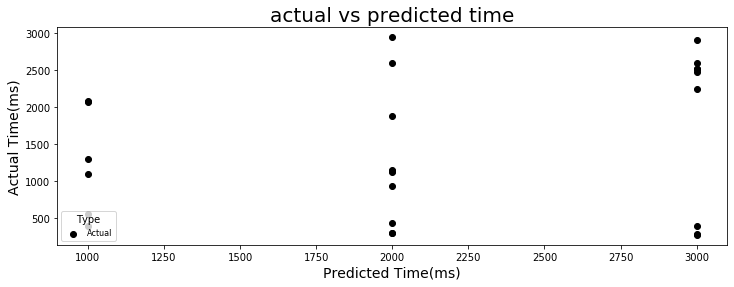

In [52]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(temp5_df["ptime"],y=temp5_df["time"],color='black',label='Actual')

ax.set_title('actual vs predicted time',fontsize=20)
ax.set_ylabel('Actual Time(ms)',fontsize=14)
ax.set_xlabel('Predicted Time(ms)',fontsize=14)
ax.legend(loc="lower left",title="Type",fontsize="8")
def onclick(event):
    print( 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
        event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [55]:
press_low_df = temp5_df[temp5_df['pr1'] < 0.02]
press_low_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time,ptime
54,C1,8828,0.0099,50,50,50,True,100.0,29.520,72,47,53.5,29.8,3.70 - 73.1j,150.6,0.0,54,-51.0,1304.0,1000
747,C1,129729,0.0197,50,50,50,True,100.0,13.056,90,29,54.2,24.8,3.74 - 62.3j,123.2,0.0,747,-47.0,1884.0,2000
919,C1,160333,0.0194,50,50,50,True,200.0,10.156,90,29,64.4,23.9,2.87 - 62.4j,158.8,0.0,919,-46.0,2600.0,2000
1101,C1,192565,0.0188,50,50,50,True,300.0,16.056,72,10,64.5,23.9,2.86 - 62.3j,182.4,0.0,1101,-31.0,2949.0,2000
1423,C1,250106,0.0194,50,50,50,True,100.0,15.260,90,16,48.3,26.6,4.69 - 63.2j,123.2,0.0,1423,-44.0,2524.0,3000
1763,C1,312556,0.0187,50,50,50,True,300.0,17.964,90,10,64.5,23.9,2.86 - 62.3j,182.8,0.0,1763,-31.0,2517.0,3000
1926,C1,342636,0.0188,50,50,50,True,400.0,24.356,90,10,64.6,23.9,2.85 - 62.3j,195.8,0.0,1926,-29.0,2914.0,3000


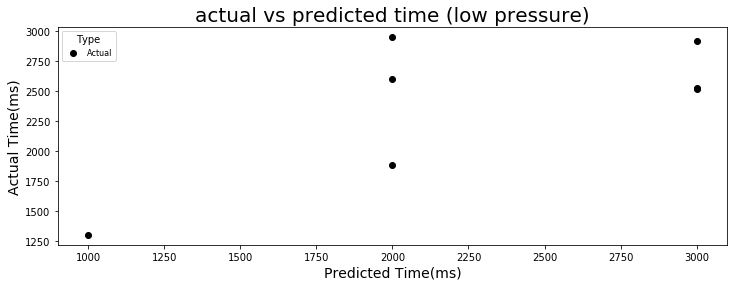

<Figure size 432x288 with 0 Axes>

In [70]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(press_low_df["ptime"],y=press_low_df["time"],color='black',label='Actual')

ax.set_title('actual vs predicted time (low pressure)',fontsize=20)
ax.set_ylabel('Actual Time(ms)',fontsize=14)
ax.set_xlabel('Predicted Time(ms)',fontsize=14)
ax.legend(loc="upper left",title="Type",fontsize="8")
plt.show()
plt.savefig("low_pressure.png")

In [58]:
press_med_df = temp5_df[(temp5_df['pr1'] > 0.02) & (temp5_df['pr1']<0.04)]
press_med_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time,ptime
116,C1,19651,0.0369,70,70,70,True,100.0,11.976,29,10,32.5,28.3,6.66 - 61.1j,130.00,0.0,116,-47.0,2087.0,1000
288,C1,49621,0.0361,70,70,70,True,200.0,29.520,28,10,38.3,27.3,5.88 - 63.5j,131.00,0.0,288,-49.0,2074.0,1000
462,C1,79590,0.0365,70,70,70,True,300.0,44.264,29,13,42.1,26.9,5.13 - 63.7j,146.00,0.0,462,-51.0,549.0,1000
799,C1,138885,0.0358,70,70,70,True,100.0,27.868,75,10,43.9,26.7,5.15 - 62.8j,123.20,0.0,799,-51.0,926.0,2000
971,C1,169063,0.0359,70,70,70,True,200.0,11.672,73,10,50.6,24.5,3.74 - 60.7j,131.39,0.0,971,-50.0,1150.0,2000
1137,C1,198847,0.0356,70,70,70,True,300.0,26.004,72,10,49.9,25.0,4.29 - 61.0j,152.39,0.0,1137,-52.0,433.0,2000
1311,C1,229541,0.0299,70,70,70,True,400.0,20.312,75,12,62.4,23.3,3.03 - 60.5j,167.80,0.0,1311,-45.0,1119.0,2000
1479,C1,260159,0.0370,70,70,70,True,100.0,17.800,90,10,38.7,28.3,6.03 - 65.1j,123.20,0.0,1479,-40.0,2249.0,3000
1644,C1,290398,0.0373,70,70,70,True,200.0,25.260,90,10,48.6,25.0,4.16 - 61.5j,123.20,0.0,1644,-41.0,2480.0,3000
1806,C1,320345,0.0372,70,70,70,True,300.0,46.236,90,10,49.3,24.3,6.48 - 62.0j,147.00,0.0,1806,-41.0,387.0,3000


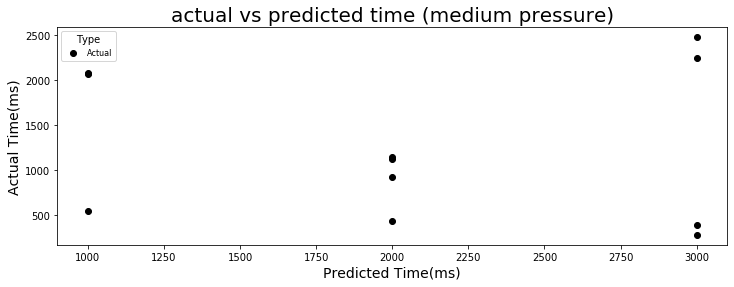

<Figure size 432x288 with 0 Axes>

In [69]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(press_med_df["ptime"],y=press_med_df["time"],color='black',label='Actual')

ax.set_title('actual vs predicted time (medium pressure)',fontsize=20)
ax.set_ylabel('Actual Time(ms)',fontsize=14)
ax.set_xlabel('Predicted Time(ms)',fontsize=14)
ax.legend(loc="upper left",title="Type",fontsize="8")
plt.show()
plt.savefig("medium_pressure.png")

In [59]:
press_high_df = temp5_df[(temp5_df['pr1'] > 0.04)]
press_high_df

,idd,t1,pr1,f1,f2,f3,o_o,pw1,re,x1,x2,x1r,x2r,z,a1,pw1_Diff,index1,index1_Diff,time,ptime
522,C1,89652,0.0486,80,80,80,True,300.0,27.684,23,10,49.5,25.3,4.47 - 61.2j,138.80,0.0,522,-44.0,1093.0,1000
690,C1,119619,0.0486,80,80,80,True,400.0,44.496,28,11,46.6,25.5,4.36 - 62.2j,138.20,0.0,690,-47.0,386.0,1000
856,C1,149046,0.0483,80,80,80,True,100.0,9.416,75,13,48.8,24.3,6.36 - 63.1j,123.20,0.0,856,-50.0,1139.0,2000
1023,C1,178132,0.0470,80,80,80,True,200.0,177.568,74,11,70.5,12.8,2.36 - 27.3j,172.80,0.0,1023,-55.0,290.0,2000
1193,C1,208642,0.0481,80,80,80,True,300.0,18.508,71,11,52.4,23.9,5.56 - 53.0j,145.60,0.0,1193,-52.0,289.0,2000
1532,C1,270121,0.0489,80,80,80,True,100.0,7.896,90,10,47.6,24.7,6.05 - 64.1j,123.20,0.0,1532,-44.0,2522.0,3000
1698,C1,300336,0.0494,80,80,80,True,200.0,15.200,90,10,50.9,25.0,4.06 - 61.6j,131.39,0.0,1698,-42.0,2606.0,3000
1859,C1,330166,0.0494,80,80,80,True,300.0,60.864,90,10,32.5,26.6,6.11 - 61.6j,131.39,0.0,1859,-42.0,269.0,3000


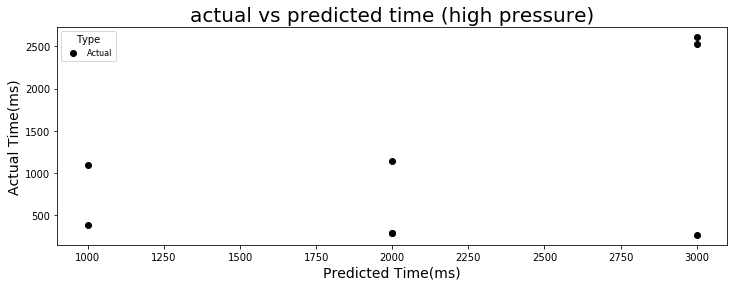

<Figure size 432x288 with 0 Axes>

In [71]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(press_high_df["ptime"],y=press_high_df["time"],color='black',label='Actual')

ax.set_title('actual vs predicted time (high pressure)',fontsize=20)
ax.set_ylabel('Actual Time(ms)',fontsize=14)
ax.set_xlabel('Predicted Time(ms)',fontsize=14)
ax.legend(loc="upper left",title="Type",fontsize="8")
plt.show()
plt.savefig("high_pressure.png")